# STOCK PRICE PREDICTION

In [41]:
# importing all the necessary libraries
import pandas as pd
import numpy as np



In [42]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas_datareader as pdr


In [44]:
st_df=pdr.get_data_tiingo('AAPL',api_key='0ed755a72a4c569099d3bd0cea444c58eca3cb4a')

C:\Users\ansht\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [45]:
st_df.to_csv('APPL.csv')
st_df=pd.read_csv('APPL.csv')

In [46]:
st_df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-09 00:00:00+00:00,170.05,173.09,169.85,169.88,29017718,40.473191,41.196734,40.425590,40.432730,116070872,0.0,1.0
1,AAPL,2018-04-10 00:00:00+00:00,173.25,174.00,171.53,173.00,28614241,41.234815,41.413321,40.825442,41.175314,114456964,0.0,1.0
2,AAPL,2018-04-11 00:00:00+00:00,172.44,173.92,171.70,172.23,22431640,41.042029,41.394281,40.865904,40.992048,89726560,0.0,1.0
3,AAPL,2018-04-12 00:00:00+00:00,174.14,175.00,173.04,173.41,22889285,41.446642,41.651329,41.184834,41.272897,91557140,0.0,1.0
4,AAPL,2018-04-13 00:00:00+00:00,174.73,175.84,173.85,174.78,25124255,41.587067,41.851255,41.377620,41.598967,100497020,0.0,1.0


In [47]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.8+ KB


In [48]:
st_df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [49]:
st_df1=st_df.reset_index()['close']

In [50]:
st_df1.shape

(1259,)

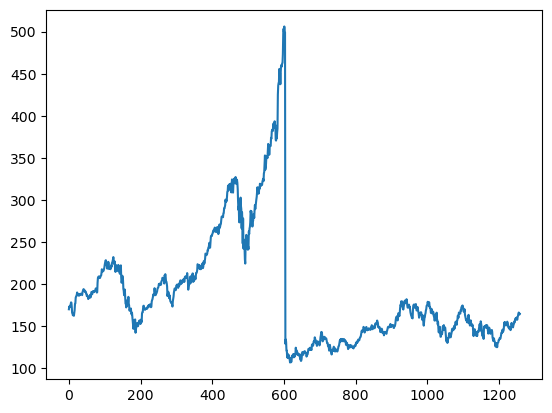

In [51]:
import matplotlib.pyplot as plt
plt.plot(st_df1)

In [52]:
# using Long Term Short Memory for this
#Normalizing using MinMax scaler
from sklearn.preprocessing import MinMaxScaler


In [53]:
scaler=MinMaxScaler(feature_range=(0,1))
st_df1=scaler.fit_transform(np.array(st_df1).reshape(-1,1))

In [54]:
st_df1.shape

(1259, 1)

# TRAINING & TESTING

In [55]:
training_size=int(len(st_df1)*0.65)
test_size=len(st_df1)-training_size
train_data,test_data=st_df1[0:training_size,:],st_df1[training_size:len(st_df1),:1]

In [56]:
training_size,test_size

(818, 441)

In [57]:
train_data

array([[1.58321853e-01],
       [1.66336882e-01],
       [1.64308078e-01],
       [1.68566061e-01],
       [1.70043832e-01],
       [1.72773951e-01],
       [1.78835316e-01],
       [1.77833438e-01],
       [1.65209768e-01],
       [1.47476518e-01],
       [1.46274264e-01],
       [1.40513463e-01],
       [1.42291797e-01],
       [1.43719474e-01],
       [1.38960551e-01],
       [1.46324358e-01],
       [1.55942392e-01],
       [1.74652473e-01],
       [1.75453976e-01],
       [1.92836569e-01],
       [1.96167815e-01],
       [1.98396994e-01],
       [2.01678147e-01],
       [2.08390733e-01],
       [2.04758923e-01],
       [2.03656857e-01],
       [1.99373826e-01],
       [2.03731997e-01],
       [2.00751409e-01],
       [1.99048215e-01],
       [2.02354415e-01],
       [2.01177207e-01],
       [2.04182843e-01],
       [2.03656857e-01],
       [2.04733876e-01],
       [2.03030683e-01],
       [2.02028804e-01],
       [2.00450845e-01],
       [2.08891672e-01],
       [2.12874139e-01],


In [58]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [59]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [60]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [63]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [64]:
print(X_test.shape), print(ytest.shape)

(1, 100)
(1,)


(None, None)

In [66]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)